In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

(-0.5, 63.5, 63.5, -0.5)

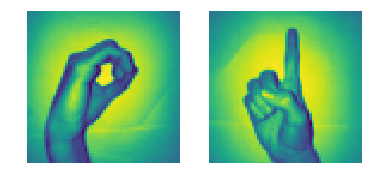

In [73]:
X_l = np.load('./Sign-language-digits-dataset/X.npy')
Y_l = np.load('./Sign-language-digits-dataset/Y.npy')
img_size = 64
plt.subplot(1,2,1)
plt.imshow(X_l[260])
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(X_l[900])
plt.axis('off')

In [74]:
X = np.concatenate((X_l[204:409],X_l[822:1027]),axis = 0)
z = np.zeros(205)
o = np.ones(205)
Y = np.concatenate((z,o),axis=0).reshape(X.shape[0],1)

In [75]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.15,random_state=42)
number_of_train = X_train.shape[0]
number_of_test =  X_test.shape[0]

In [76]:
X_train_flatten = X_train.reshape(X_train.shape[0],-1).T
X_test_flatten = X_test.reshape(X_test.shape[0],-1).T
Y_train_flatten = Y_train.T
Y_test_flatten = Y_test.T
Y_train_flatten.shape

(1, 348)

In [77]:
def initialize_parameter(dim):
    w = np.random.randn(dim,1)*0.01
    b = 0
    return w,b
# w,b = initialize_parameter(X_train_flatten.shape[0])
# w.shape

In [78]:
def sigmoid(z):
    y_head = 1 / (1 + np.exp(-z))
    return y_head

In [79]:
def forword_propgation(w,b,X,Y):
    Z = np.dot(w.T,X) + b
    y_head = sigmoid(Z)
    loss = -(Y*np.log(y_head))-((1-Y)*np.log(1-y_head))
    cost = np.sum(loss)/X.shape[1]
    dw = np.dot(X,(y_head-Y).T)/X.shape[1]
    db = np.sum(y_head-Y)/X.shape[1]
    grad = {"dw":dw,"db":db}
    return cost, grad

In [80]:
def update_parameter(w,b,X_train,Y_train,learning_rate,no_of_iteration):
    for i in range(no_of_iteration):
        cost,grad = forword_propgation(w,b,X_train,Y_train)
        w = w - learning_rate * grad["dw"]
        b = b - learning_rate * grad["db"]
        if i%100 == 0:
            print("cost",cost)
    parameter = {"w":w,"b":b}
    return parameter,cost

In [81]:
def predict(w,b,X):
    Z = sigmoid(np.dot(w.T,X) + b)
    Y_prediction = np.zeros((1,X.shape[1]))
    
    for i in range(Z.shape[1]):
        if Z[0,i] >= 0.5:
            Y_prediction[0,i] = 1
        else:
            Y_prediction[0,i] = 0
    return Y_prediction

In [82]:
def logistic_regression(x_train, y_train, x_test, y_test, learning_rate , num_iterations):
    # initialize
    dimension =  x_train.shape[0]  # that is 4096
    w,b = initialize_parameter(dimension)
    
    # do not change learning rate
    parameters,cost_list = update_parameter(w, b, x_train, y_train, learning_rate,num_iterations)
    
    y_prediction_test = predict(parameters["w"],parameters["b"],x_test)
    y_prediction_train = predict(parameters["w"],parameters["b"],x_train)

    # Print train/test Errors
    print("train accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_train - y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_test - y_test)) * 100))
    
logistic_regression(X_train_flatten, Y_train_flatten, X_test_flatten, Y_test_flatten,learning_rate = 0.01, num_iterations = 1000)

cost 0.7028476093600933
cost 0.6630548907329463
cost 0.1719776306258434
cost 0.14738620638791344
cost 0.1317296072525358
cost 0.12023096729730555
cost 0.11113608439288884
cost 0.10363071319797555
cost 0.09726396832262851
cost 0.09175554769812191
train accuracy: 97.98850574712644 %
test accuracy: 93.54838709677419 %
